libpng warning: iCCP: known incorrect sRGB profile


(<matplotlib.image.AxesImage at 0x15a0c1280>, Text(0.5, 1.0, 'Blurred'))

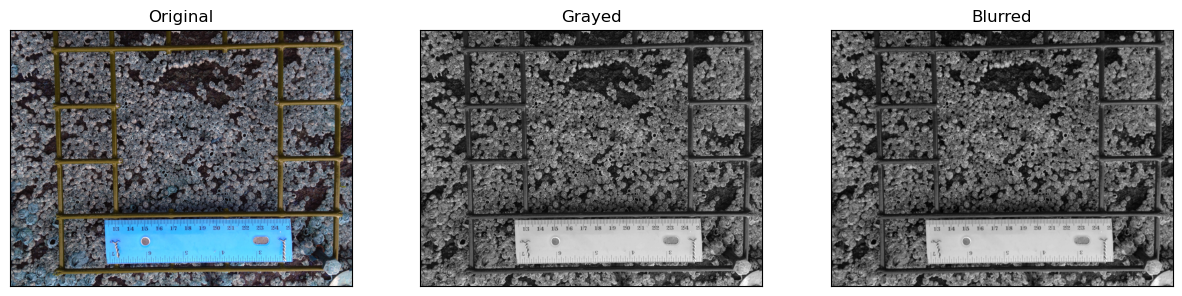

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt



#load image
img = cv2.imread("unseen_img1.png") 

#check if loaded correctly
if img is None:
    print("Error: image could not be loaded")
    exit()

#need to detect green and then apply the gray filtering

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


# cv2.imshow("Grayed Image", gray)
# cv2.waitKey(5)
# cv2.destroyAllWindows()

blurred = cv2.GaussianBlur(gray, (9, 9), 2)


#using matplot lib to display images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.xticks([]), plt.yticks([])
plt.imshow(img),plt.title('Original')

#used cmap to set the color mapping to gray
plt.subplot(1, 3, 2)
plt.xticks([]), plt.yticks([])
plt.imshow(gray, cmap = 'gray'),plt.title('Grayed')



plt.subplot(1, 3, 3)
plt.xticks([]), plt.yticks([])
plt.imshow(blurred, cmap='gray'), plt.title('Blurred')


had to rely on a multitude of resources
learned more about filtering - had a hard time deciding which track to pursue, but decided to start as simple as possible and then build my way up to more complicated implementation

[[[2069.4001  1018.2       19.24   ]
  [ 815.4     2158.2002    19.24   ]
  [1239.      1522.2001    19.24   ]
  ...
  [1378.2001  1451.4       11.08   ]
  [2867.4001   259.80002   11.08   ]
  [2550.6      701.4       10.84   ]]]
8010
bye


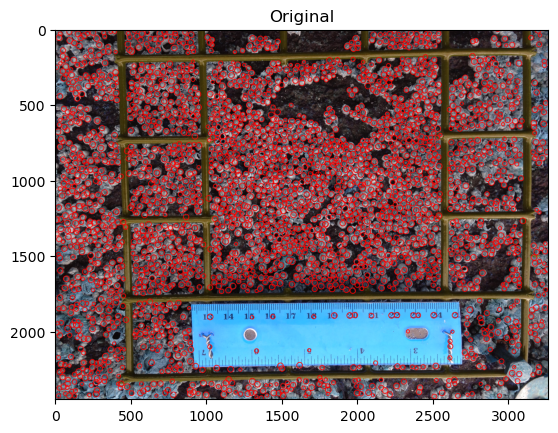

In [2]:
#Hough Circle transform
# plt.imshow(img),plt.title('Original')

circles = cv2.HoughCircles(
    blurred, 
    cv2.HOUGH_GRADIENT, 
    dp=1.2, 
    minDist=20, 
    param1=50, 
    param2=20,  # Adjust sensitivity
    minRadius=10,  # Try a reasonable minimum radius
    maxRadius=20  # Try a reasonable maximum radius
)

if circles is not None:
    
    print(circles)
    circles = np.uint16(np.around(circles))
    # for i in range(10):
    for i in circles[0, :]:
        center = (i[0], i[1])
        radius = i[2]
        cv2.circle(img, center, radius, (255, 0, 0), 3)

print(circles.size)

plt.imshow(img),plt.title('Original')

# plt.xticks([]), plt.yticks([])
